In [15]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.2. Изучите стоимости недвижимости

Для начала выведем описательную статистику по признаку "Цены" ("Price"),чтобы определить оптимальную визуализацию

In [13]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

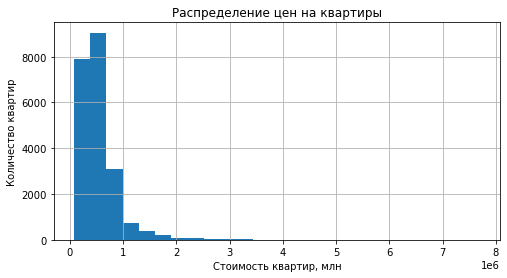

In [15]:
plt.figure(figsize =(8,4))
df['price'].hist(bins = 25)
plt.title('Распределение цен на квартиры')
plt.xlabel ('Стоимость квартир, млн')
plt.ylabel('Количество квартир')
plt.show()

Мы видим, что в основном представлены цены от 0 до 1 миллиона (долларов?), но хотелось бы присмотреться поконкретнее
Распределение выглядит ближе к геометрическому

В связи с этим посмотрим два графика (распределение цен до миллиона и распределение цен больше миллиона)

In [17]:
minimum = df[df['price']<1000000.0]
maximum = df[df['price']>1000000.0]


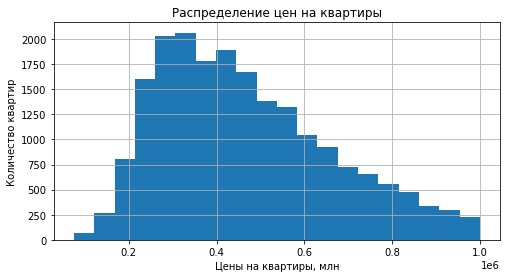

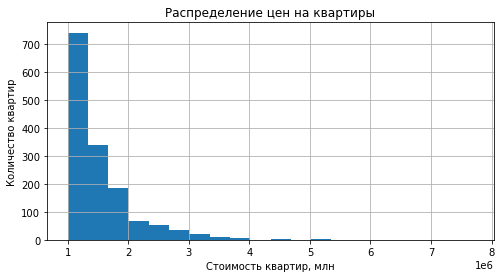

In [19]:
plt.figure(1,figsize =(8,4))
minimum['price'].hist(bins = 20)
plt.title('Распределение цен на квартиры')
plt.xlabel ('Цены на квартиры, млн')
plt.ylabel('Количество квартир')
plt.show()
plt.figure(2,figsize =(8,4))
maximum['price'].hist(bins = 20)
plt.title('Распределение цен на квартиры')
plt.xlabel ('Стоимость квартир, млн')
plt.ylabel('Количество квартир')
plt.show()

Теперь мы более детально видим, что больше всего квартир продается по стоимости в 400 тысяч (от 200 до 600 тысяч), а вот среди сегмента от 1 миллиона около 1200 квартир (примерно 5%) продается по цене от 1 до 2 миллиона, а вот от 2 миллионов квартир значительно меньше (что вполне понятно). 


### 1.3. Изучите распределение квадратуры жилой
### 1.4. Изучите распределение года постройки

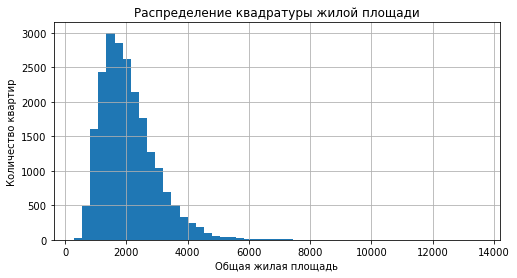

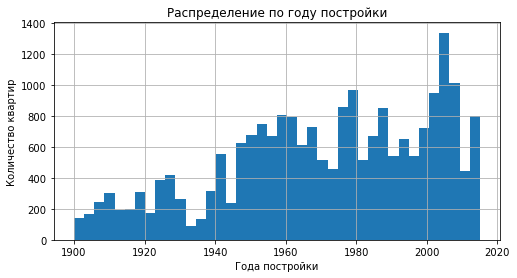

In [21]:
plt.figure(1,figsize =(8,4))
df['sqft_living'].hist(bins = 50)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel ('Общая жилая площадь')
plt.ylabel('Количество квартир')
plt.show()
plt.figure(2,figsize =(8,4))
df['yr_built'].hist(bins = 40)
plt.title('Распределение по году постройки')
plt.xlabel ('Года постройки')
plt.ylabel('Количество квартир')
plt.show()

Полагаю, что квадратура жилой площади дается в американской мерке. Большинство квартир имеют площадь от 1000 до 2500. Можно было бы убрать квартильные значения (от 75%) и посмотреть распределение детальнее, но это не входит в задачу. 

Распределение по годам постройки скорее ненормальное (к другим видам его тоже сложэно отнести). Заметно, что был определенный пик строительства в 1960-е, падение в 1970-е и  потом каждые 10 лет появлялись новые постройки. Самый пик строительства был примерно в 2005. 

# Условие 2: 2 задача
2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2.2. Изучите распределение этажей домов
2.3. Изучите распределение состояния домов

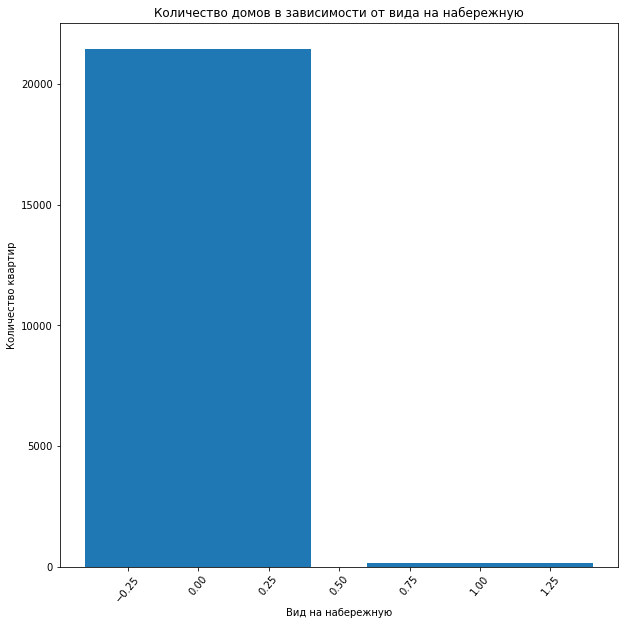

In [23]:
plt.figure (figsize = (10,10))
plt.bar(df['waterfront'].unique(),df['waterfront'].value_counts())
plt.title('Количество домов в зависимости от вида на набережную')
plt.xlabel ('Вид на набережную')
plt.ylabel('Количество квартир')
plt.xticks(rotation=50)
plt.show()

В основном представлены квартиры без вида на набережную

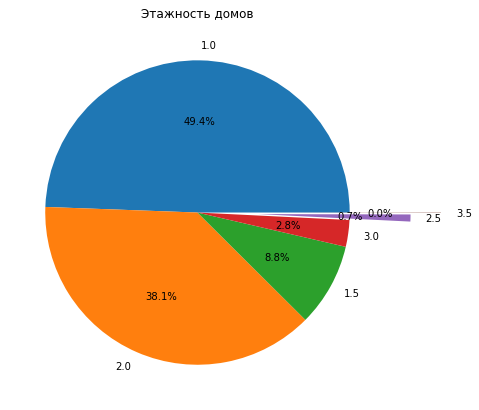

In [27]:
plt.figure (figsize = (7,7))
explode = [0,0,0,0,0.4,0.6]
plt.pie(df['floors'].value_counts(),labels = df['floors'].unique(),autopct = '%1.1f%%',explode= explode)
plt.title('Этажность домов')
plt.show()

В основном встречаются 1-2 этажные дома. 

Далее посмотрим распределение оценок 

<AxesSubplot:xlabel='grade', ylabel='grade'>

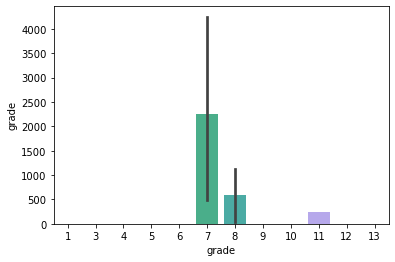

In [29]:
sns.barplot(data = df, x='grade', y = df['grade'].value_counts())

В основном представлены квартиры с оценкой 7, 8 и 11

# Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

In [38]:
data = df.groupby(['sqft_living'])['price'].mean().reset_index()


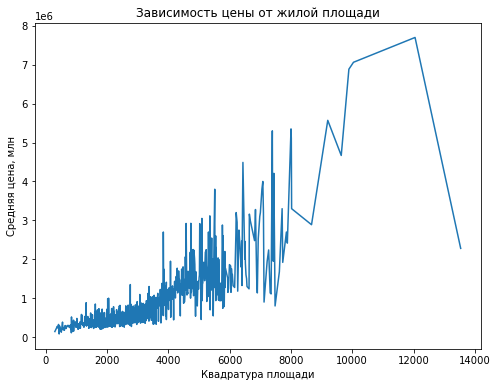

In [37]:
plt.figure (figsize = (8,6))
sns.lineplot (x=data['sqft_living'],y = data['price'])
plt.title ('Зависимость цены от жилой площади')
plt.xlabel ('Квадратура площади')
plt.ylabel ('Средняя цена, млн');

Как видно из графика, средняя цена растет в зависимости от жилой площади. Заметно, несколько выбросов, в связи с чем необходимо убрать максимальные значения квадратуры площади, либо перепроверить цену.

array([0, 3, 4, 2, 1], dtype=int64)

In [40]:
data1 = df['price'][df['view']==0]
data2 = df['price'][df['view']==1]
data3 = df['price'][df['view']==2]
data4 = df['price'][df['view']==3]
data5 = df['price'][df['view']==4]


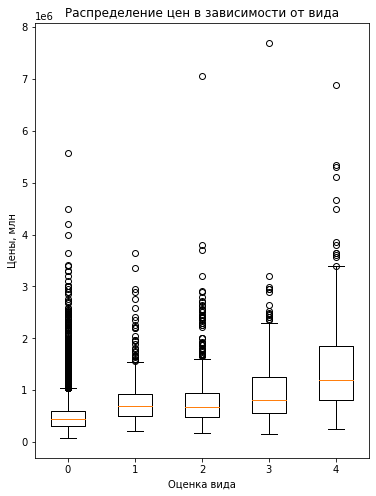

In [42]:
plt.figure(figsize = (6,8))
plt.boxplot([data1,data2,data3,data4,data5])
plt.title ('Распределение цен в зависимости от вида')
plt.xlabel ('Оценка вида')
plt.ylabel ('Цены, млн')
plt.xticks([1,2,3,4,5],[0,1,2,3,4]);

Согласно графику выше, медианная цена повышается примерно на 250 тысяч, если оценка равна единице (по сравнению с нулевой). При этом нижние квартильные и медианные значения совпадают при оценках 2,3,4. Верхний квартиль повышается при оценке 3. Оценка 4 оказывает существенное влияние на цену(нижний квартиль соответствует медиане первых трех групп, верхний квартиль значительно выше. Соответственно самые дешевые квартиры будут с оценкой вида равной нулю. Оценка вида от 2 до 4 не существенно влияет на ценнообразование. А вот квартиры с самым лучшим видом стоят дороже всех (однако, мы не можем сказать, что влияет именно этот фактор, может быть у этих квартир есть какие-то другие переменные, которые будут оказывать более влияение в регрессионной модели).

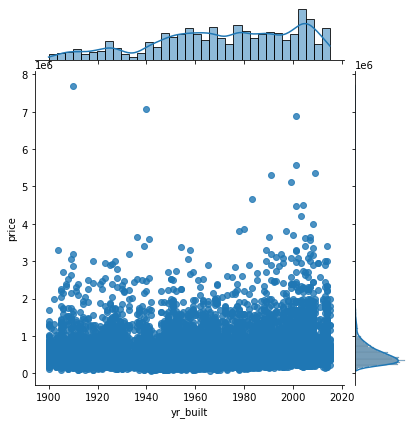

In [45]:
sns.jointplot(x= df['yr_built'],y = df['price'], kind = 'reg');


Как видно из графика, более дешевые квартиры (до миллиона), которые составляют основу выборки, равномерно распределны в зависимости от года постройки. А вот квартиры подороже встречаются уже среди более "молодого" фонда. 

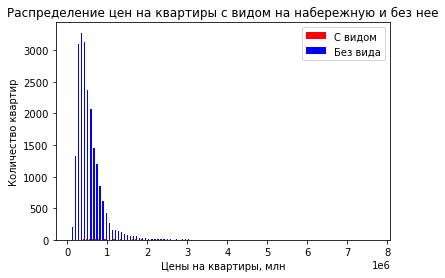

In [47]:
x1 = list(df[df['waterfront'] == 1]['price'])
x2 = list(df[df['waterfront'] == 0]['price'])
colors = ['red', 'blue']
names = ['С видом', 'Без вида']
plt.hist([x1, x2], bins = 100, color = colors, label=names)

plt.legend()
plt.xlabel('Цены на квартиры, млн')
plt.ylabel('Количество квартир')
plt.title('Распределение цен на квартиры с видом на набережную и без нее');

Т.к. количетво квартир с видом на набережную очень мало (примерно 1 процент), то визуальное представление мало, что нам дает. Видно, что цены на квартиры с видом на набережную начинаются от полумилиона и их количество равномерно распределено в диапазоне цен от полумилиона до двух. 

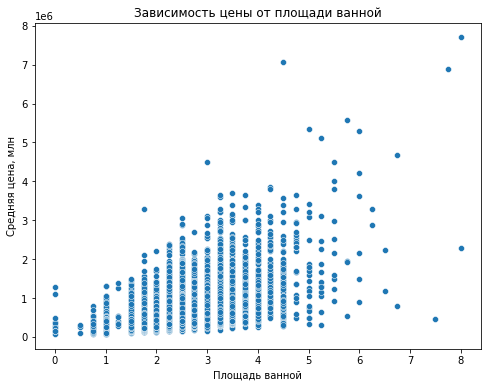

In [63]:
plt.figure (figsize = (8,6))
sns.scatterplot (x=df['bathrooms'],y = df['price'])
plt.title ('Зависимость цены от площади ванной')
plt.xlabel ('Площадь ванной')
plt.ylabel ('Средняя цена, млн');

Рост цен на квартиры частично связан с площадью ванной. Чем она выше, тем больше цена. Есть квартиры без ванной (скорее всего выбросы), есть с большой квадратурой и низкой ценой (вероятно, ошибки).

Вывод: данные требуют дополнительной предобработки (исключение выборосов). 